#  <font color='blue'>Mean Machine - Polynomial Regression</font>

In this notebook we will use data on house sales in King County to predict house prices using polynomial regression. The tasks herewith are to
* use matplotlib to visualize polynomial regressions
* use matplotlib to visualize the same polynomial degree on different subsets of the data
* use a validation set to select a polynomial degree
* assess the final fit using test data

# 1: Set the path that includes all relevant files

In [1]:
import os                                               # 操作系统用来管理文件路径
os.chdir("C:\Users\stevenwsy\Desktop\Steven - Python")  # 将路径改为 "C:\Users\stevenwsy\Desktop\Steven - Python"

# 注意：你们要把 "C:\Users\stevenwsy\Desktop\Steven - Python" 改成在你们电脑里面的路径

# 2: Import all relevant packages

In [2]:
import numpy as np     # 用来做数学运算
import pandas as pd    # 用来处理数据表

# 将所有图都在 Notebook 里显示
%matplotlib inline               
import matplotlib.pyplot as plt  # 用来画图

from sklearn.linear_model import LinearRegression     # 线性回归
from sklearn.cross_validation import train_test_split # 做交叉验证，划分训练集和测试集

# 3: Test polynomial_features function

Define a function to create our features for a polynomial regression model of any degree:

In [3]:
def polynomial_features( data, deg=2 ):
    data1 = data.copy()
    
    if isinstance(data1, pd.DataFrame):
        column_label = data1.columns.values.tolist()[0]
        data1.rename( columns={column_label: 'power_1'} )
    else:
        data1 = pd.DataFrame( np.array(data1), columns=['power_1'] )
    
    # in our example the type of data_copy['power_1'] is int64, and
    # negative number will show up when the degree is high, hence we
    # change its type to float64 to handle large number
    data1['power_1'] = data1['power_1'].astype('float64')
    
    for i in range(1,deg):
        data1['power_'+str(i+1)] = data1['power_'+str(i)]*data1['power_1']
    return data1

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [4]:
# Input is a dataframe
tmp = pd.DataFrame( np.array([1,2,3]), columns=['power_1'] )
print polynomial_features( tmp, 3 )
# Input is a numeric array
tmp = np.array([1,2,3])
print polynomial_features( tmp, 3 )

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0
   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# 4: Load house sales data

In [5]:
sales = pd.read_csv('kc_house_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
sales.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 4: Plot house sales data

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.
For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [8]:
sales = sales.sort_values( ['sqft_living','price'] )
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [9]:
data = polynomial_features( sales['sqft_living'], 1 )
data['price'] = sales['price'].values # add price to the data since it's the target

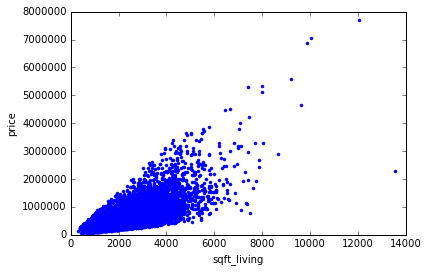

In [10]:
def plot_data(data):    
    plt.plot( data['power_1'], data['price'], 'b.', label = 'data' )
    plt.xlabel('sqft_living')
    plt.ylabel('price')

plot_data(data)

# 5: Basic functions

In [11]:
def polynomial_regression( data, deg=2 ):
    input_value = data.iloc[:,0:deg].values
    output_value = data['price'].values
    
    model = LinearRegression( normalize=True )
    model.fit( input_value, output_value )
    return model

In [12]:
def plot_predictions( data, model ):
    plot_data(data)

    deg = len(model.coef_)
    
    x_pred = polynomial_features(data['power_1'], deg )
    y_pred = model.predict( x_pred.values )
    
    # plot predictions
    plt.plot(x_pred['power_1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')

In [13]:
def print_coefficients( model ):        
    deg = len(model.coef_)
    # Get learned parameters as a list
    w = list( np.hstack((model.intercept_,model.coef_)) )

    # Numpy has a nifty function to print out polynomials in a pretty way
    print 'Learned polynomial for degree ' + str(deg) + ':\n'
    w.reverse()
    print np.poly1d(w)

In [14]:
def polynomial_output( set, deg=15 ):
    data = polynomial_features( set['sqft_living'], deg )
    data['price'] = set['price'].values
    model = polynomial_regression( data, deg )
    print_coefficients( model )
    plot_predictions( data, model )

Learned polynomial for degree 1:

 
280.8 x - 4.387e+04


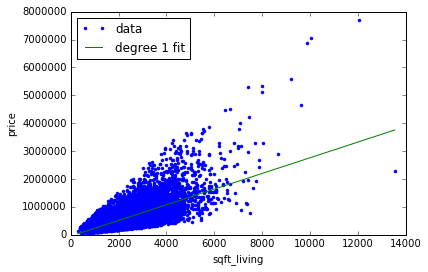

In [15]:
polynomial_output( sales, deg=1 )

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

Learned polynomial for degree 2:

        2
0.0386 x + 68.07 x + 1.991e+05


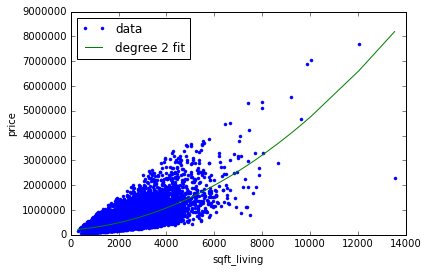

In [16]:
polynomial_output( sales, deg=2 )

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

Learned polynomial for degree 3:

           3           2
-3.85e-06 x + 0.08719 x - 90.51 x + 3.37e+05


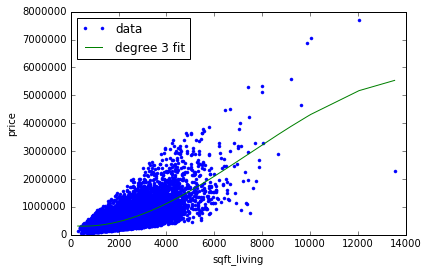

In [17]:
polynomial_output( sales, deg=3 )

Now try a 15th degree polynomial:

Learned polynomial for degree 15:

           15             14             13             12
3.744e-48 x  - 3.221e-43 x  + 1.246e-38 x  - 2.864e-34 x 
              11             10             9             8
 + 4.362e-30 x  - 4.643e-26 x  + 3.552e-22 x - 1.977e-18 x
              7            6            5             4           3
 + 8.026e-15 x - 2.36e-11 x + 4.95e-08 x - 7.213e-05 x + 0.07013 x
          2
 - 42.65 x + 1.457e+04 x - 1.866e+06


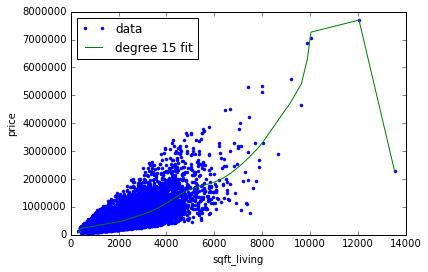

In [18]:
polynomial_output( sales, deg=15 )

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# 6: Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Print the coefficients to view all of them) and plot the resulting fit.

In [19]:
(set_1_2, set_3_4) = train_test_split(sales, train_size=0.5, random_state=0)
(set_1, set_2) = train_test_split(set_1_2, train_size=0.5, random_state=0)
(set_3, set_4) = train_test_split(set_3_4, train_size=0.5, random_state=0)
set_1 = set_1.sort_values( ['sqft_living','price'] )
set_2 = set_2.sort_values( ['sqft_living','price'] )
set_3 = set_3.sort_values( ['sqft_living','price'] )
set_4 = set_4.sort_values( ['sqft_living','price'] )

Learned polynomial for degree 15:

           15             14             13             12
1.713e-46 x  - 1.043e-41 x  + 2.839e-37 x  - 4.571e-33 x 
              11             10             9             8
 + 4.851e-29 x  - 3.581e-25 x  + 1.892e-21 x - 7.252e-18 x
              7             6             5             4           3
 + 2.025e-14 x - 4.092e-11 x + 5.892e-08 x - 5.856e-05 x + 0.03804 x
          2
 - 14.57 x + 2766 x + 9.001e+04


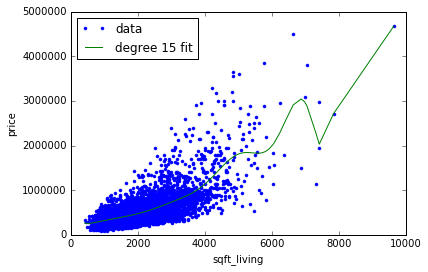

In [20]:
polynomial_output( set_1 )

Learned polynomial for degree 15:

           15            14             13            12             11
8.786e-46 x  - 5.45e-41 x  + 1.528e-36 x  - 2.56e-32 x  + 2.862e-28 x 
              10             9             8             7
 - 2.255e-24 x  + 1.289e-20 x - 5.434e-17 x + 1.696e-13 x
              6             5             4          3         2
 - 3.908e-10 x + 6.565e-07 x - 0.0007861 x + 0.6462 x - 342.1 x + 1.037e+05 x - 1.324e+07


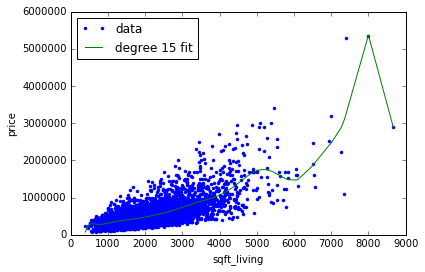

In [21]:
polynomial_output( set_2 )

Learned polynomial for degree 15:

            15             14             13             12
-3.287e-47 x  + 2.492e-42 x  - 8.409e-38 x  + 1.671e-33 x 
              11             10            9             8
 - 2.181e-29 x  + 1.975e-25 x  - 1.28e-21 x + 6.021e-18 x
              7             6             5             4          3
 - 2.069e-14 x + 5.184e-11 x - 9.363e-08 x + 0.0001195 x - 0.1037 x
          2
 + 57.24 x - 1.747e+04 x + 2.357e+06


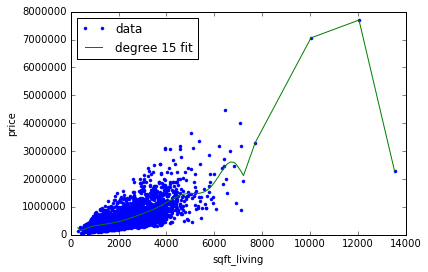

In [22]:
polynomial_output( set_3 )

Learned polynomial for degree 15:

           15             14             13            12
4.843e-46 x  - 3.229e-41 x  + 9.704e-37 x  - 1.74e-32 x 
              11            10             9             8
 + 2.076e-28 x  - 1.74e-24 x  + 1.056e-20 x - 4.702e-17 x
              7             6            5            4          3
 + 1.545e-13 x - 3.727e-10 x + 6.52e-07 x - 0.000808 x + 0.6827 x
          2
 - 369.1 x + 1.135e+05 x - 1.464e+07


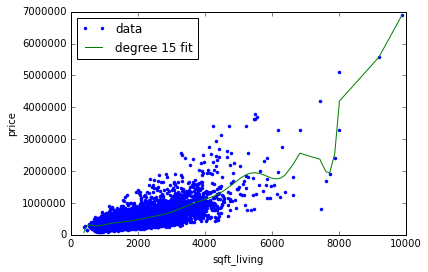

In [23]:
polynomial_output( set_4 )

# 6: Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set.

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `train_size=0.9, random_state=0`.
* Further split our training data into two sets: `training` and `validation`. Use `train_size=0.5, random_state=0`.

Again, we set `seed=1` to obtain consistent results for different users.

In [24]:
(training_and_validation, test) = train_test_split( sales, 
                                  train_size=0.9, random_state=0 )
(training, validation) = train_test_split( training_and_validation, 
                         train_size=0.5, random_state=0 )

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build a dataframe of polynomial data of train_data['sqft_living'] at the current degree
    * Add train_data['price'] to the polynomial dataframe
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data for that degree and you will need to make a polynmial dataframe using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

In [25]:
maxD = 15
RSS = list()
for deg in range(1,maxD+1):
    training_data = polynomial_features( training['sqft_living'], deg )
    training_data['price'] = training['price'].values
    model = polynomial_regression( training_data, deg )

    validation_data = polynomial_features( validation['sqft_living'], deg )
    
    y_true = validation['price'].values
    y_pred = model.predict( validation_data.values )
    
    iRSS = ((y_true - y_pred)**2).sum()
    RSS.append( iRSS )
    print "RSS with degree", str(deg), "polynomial:", str(iRSS)

    best_deg = RSS.index( min(RSS) ) + 1
print "\nThe minimum RSS on validation data is with degree", str(best_deg), "polynomial"

RSS with degree 1 polynomial: 6.35946616015e+14
RSS with degree 2 polynomial: 6.44400564094e+14
RSS with degree 3 polynomial: 6.5536661601e+14
RSS with degree 4 polynomial: 6.65264456206e+14
RSS with degree 5 polynomial: 6.26439635931e+14
RSS with degree 6 polynomial: 6.85257032324e+14
RSS with degree 7 polynomial: 1.18725174669e+15
RSS with degree 8 polynomial: 6.01621482052e+14
RSS with degree 9 polynomial: 1.1708959225e+16
RSS with degree 10 polynomial: 5.48309507584e+15
RSS with degree 11 polynomial: 3.0116560476e+18
RSS with degree 12 polynomial: 7.64994396581e+17
RSS with degree 13 polynomial: 1.64571439563e+20
RSS with degree 14 polynomial: 1.02584764093e+21
RSS with degree 15 polynomial: 2.24237274393e+21

The minimum RSS on validation data is with degree 8 polynomial


In [26]:
training_data = polynomial_features( training['sqft_living'], best_deg )
training_data['price'] = training['price'].values
best_model = polynomial_regression( training_data, best_deg )

test_data = polynomial_features( test['sqft_living'], best_deg )

y_true = test['price'].values
y_pred = best_model.predict( test_data.values )
test_RSS = ((y_true - y_pred)**2).sum()
print "The RSS on test data with degree", str(best_deg), "polynomial is", str(test_RSS)

The RSS on test data with degree 8 polynomial is 1.3177054471e+14


Learned polynomial for degree 8:

           8             7             6             5             4
5.234e-23 x - 1.373e-18 x + 1.433e-14 x - 7.374e-11 x + 1.758e-07 x
              3          2
 - 5.731e-05 x - 0.4905 x + 919.2 x - 1.529e+05


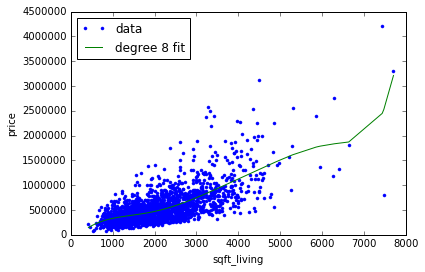

In [27]:
test = test.sort_values( ['sqft_living','price'] )
polynomial_output( test, best_deg )